# Starting with html

<!DOCTYPE html>
<html> 
    <head>
        <title>demo</title>
    </head>
    
    <body>
            <h1>Web Scrapping</h1>
            <h2>Web Scrapping</h2>
            <h3>Web Scrapping</h3>
    </body>
</html> 

w3schools html tutorial 

<!DOCTYPE html>
<html>
    <body>
        <table>
            <tr>
                <th>Name</th>
                <th>Gender</th>
                <th>location</th>
            </tr>
        </table>
    </body>
</html>

<!DOCTYPE html>
<html>
    <body>
        <table>
            <tr>
                <th>Name</th>
                <th>Gender</th>
                <th>location</th>
            </tr>
            <tr>
                <td>Afsan</td>
                <td>male</td>
                <td>Goa</td>
            </tr>
            <tr>
                <td>rahul</td>
                <td>male</td>
                <td>Goa</td>
            </tr>
        </table>
    </body>
</html>

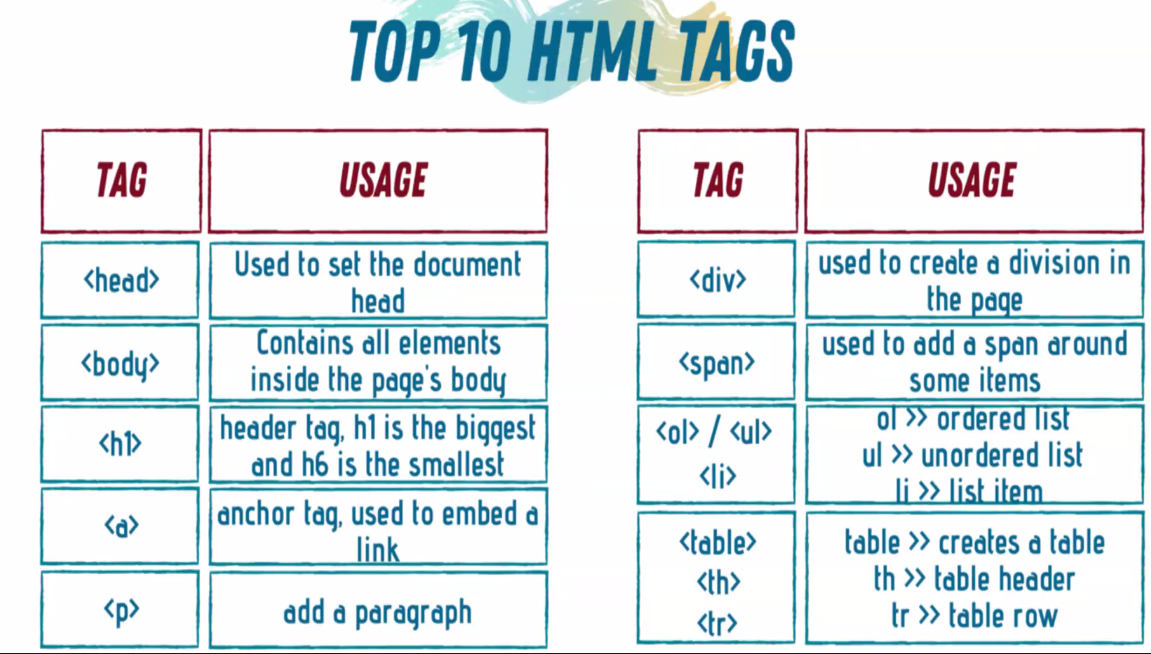

In [1]:
!pip install bs4

In [20]:
!pip install Ipython

In [6]:
<!DOCTYPE html>
<html>
    <body>
        <ul id='list' class='cool_list'>
            <li>item 1</li>
            <li>item 2</li>
            <li>item 3</li>
            <li>item 4</li>
        </ul>
    </body>
</html>

SyntaxError: invalid syntax (Temp/ipykernel_14372/3955469512.py, line 1)

In [19]:
from Ipython.core.display import display, HTML
display(HTML(some_html_string))

ModuleNotFoundError: No module named 'ipython'

In [6]:
some_html_string = """
<html>
    <body>
        <ul id='list' class='cool_list'>
            <li>item 1</li>
            <li>item 2</li>
            <li>item 3</li>
            <li>item 4</li>
        </ul>
    </body>
<html>
"""

In [7]:
from bs4 import BeautifulSoup as bs

In [8]:
bs(some_html_string)

<html>
<body>
<ul class="cool_list" id="list">
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
<li>item 4</li>
</ul>
</body>
</html>

In [9]:
soup = bs(some_html_string)
soup.find('ul')

<ul class="cool_list" id="list">
<li>item 1</li>
<li>item 2</li>
<li>item 3</li>
<li>item 4</li>
</ul>

In [10]:
soup.find('li').text

'item 1'

In [11]:
soup.find_all('li')

[<li>item 1</li>, <li>item 2</li>, <li>item 3</li>, <li>item 4</li>]

In [12]:
for i in soup.find_all('li'):
    print(i.text)


item 1
item 2
item 3
item 4


In [13]:
for item in range(len(soup.find_all('li'))):
    print (soup.find_all('li')[item].text)


item 1
item 2
item 3
item 4


In [14]:
import requests

url='https://en.wikipedia.org/wiki/List_of_countries_by_coffee_production'
data = requests.get(url)

In [15]:
data.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>List of countries by coffee production - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0b6da518-771b-4cea-b182-e1ed5d67a654","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_coffee_production","wgTitle":"List of countries by coffee production","wgCurRevisionId":1085331524,"wgRevisionId":1085331524,"wgArticleId":36196672,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from W

In [16]:
soup = bs(data.text)
soup


<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by coffee production - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"0b6da518-771b-4cea-b182-e1ed5d67a654","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_countries_by_coffee_production","wgTitle":"List of countries by coffee production","wgCurRevisionId":1085331524,"wgRevisionId":1085331524,"wgArticleId":36196672,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidat

In [18]:
table_data = soup.find('table')

In [31]:
# for row in table_data.find_all('tr'):
#     temp = row.text
#     print(temp)

# for row in table_data.find_all('tr'):
#     temp = row.text.replace('\n\n', ' ')  # to remove \n with space
#     print(temp)
 
# pandas dataframe list

countries = []
for row in table_data.find_all('tr')[1:]:
    temp = row.text.replace('\n\n', ' ').strip()  # to remove unwanted spaces
    temp_list = temp.split()
    # print(temp)
    # print(temp_list)
    countries.append(temp_list)

In [34]:
import pandas as pd

pd.DataFrame(countries)

# pd.DataFrame(countries, columns = [''])

,0,1,2,3,4,5,6,7,8
0,1,Brazil,"44,200,000","2,652,000","5,714,381,000",None,None,None,None
1,2,Vietnam,"27,500,000","1,650,000","3,637,627,000",None,None,None,None
2,3,Colombia,"13,500,000","810,000","1,785,744,000",None,None,None,None
3,4,Indonesia,"11,000,000","660,000","1,455,050,000",None,None,None,None
4,5,Ethiopia,"6,400,000","384,000","846,575,000",None,None,None,None
5,6,Honduras,"5,800,000","348,000","767,208,000",None,None,None,None
6,7,India,"5,800,000","348,000","767,208,000",None,None,None,None
7,8,Uganda,"4,800,000","288,000","634,931,000",None,None,None,None
8,9,Mexico,"3,900,000","234,000","515,881,000",None,None,None,None
9,10,Guatemala,"3,400,000","204,000","449,743,000",None,None,None,None


In [37]:
countries = []
for row in table_data.find_all('tr')[1:11]:
    temp = row.text.replace('\n\n', ' ').strip()
    temp = temp.split()
    countries.append(temp)

In [38]:
pd.DataFrame(countries)

,0,1,2,3,4
0,1,Brazil,"44,200,000","2,652,000","5,714,381,000"
1,2,Vietnam,"27,500,000","1,650,000","3,637,627,000"
2,3,Colombia,"13,500,000","810,000","1,785,744,000"
3,4,Indonesia,"11,000,000","660,000","1,455,050,000"
4,5,Ethiopia,"6,400,000","384,000","846,575,000"
5,6,Honduras,"5,800,000","348,000","767,208,000"
6,7,India,"5,800,000","348,000","767,208,000"
7,8,Uganda,"4,800,000","288,000","634,931,000"
8,9,Mexico,"3,900,000","234,000","515,881,000"
9,10,Guatemala,"3,400,000","204,000","449,743,000"


In [40]:
# to save it in excel file

# data = pd.DataFrame(countries)
# data.to_excel('coffee.xlsx')

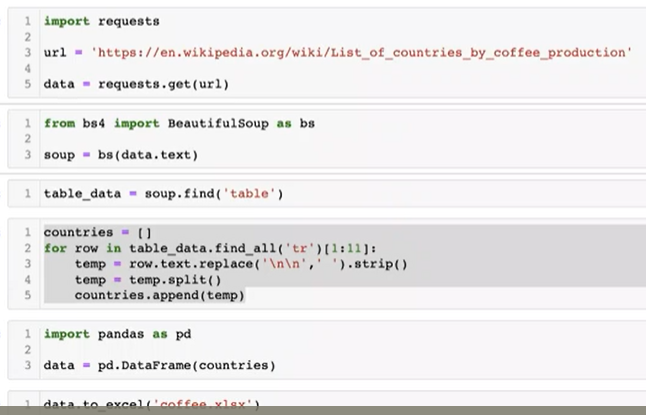